Index(['Unnamed: 0', 'Gender', 'Age', 'Schooling', 'Breastfeeding',
       'Varicella', 'Initial_Symptom', 'Mono_or_Polysymptomatic',
       'Oligoclonal_Bands', 'LLSSEP', 'ULSSEP', 'VEP', 'BAEP',
       'Periventricular_MRI', 'Cortical_MRI', 'Infratentorial_MRI',
       'Spinal_Cord_MRI', 'Initial_EDSS', 'Final_EDSS', 'group'],
      dtype='object')
Unnamed: 0                   0
Gender                       0
Age                          0
Schooling                    1
Breastfeeding                0
Varicella                    0
Initial_Symptom              1
Mono_or_Polysymptomatic      0
Oligoclonal_Bands            0
LLSSEP                       0
ULSSEP                       0
VEP                          0
BAEP                         0
Periventricular_MRI          0
Cortical_MRI                 0
Infratentorial_MRI           0
Spinal_Cord_MRI              0
Initial_EDSS               148
Final_EDSS                 148
group                        0
dtype: int64
Fitting 5 fold

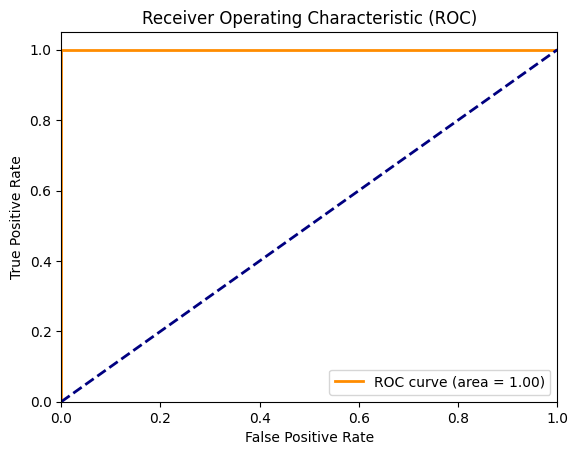

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# # Cargar los datos desde el CSV, ignorando la columna de índice
# file_path = 'C:\\Users\\48242450\\Documents\\Pruebas-Proyecto\\conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis (2).csv'
# df = pd.read_csv(file_path, index_col=0)
df = pd.read_csv('./data.csv')

# Verificar los nombres de las columnas
print(df.columns)

# Revisar si hay valores faltantes en el dataframe
print(df.isna().sum())

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X = df.drop(['group', 'Initial_EDSS', 'Final_EDSS'], axis=1)
y = df['group']

# Imputar valores faltantes en X
X_imputed = imputer.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Definir el modelo SVM y los parámetros para la búsqueda en GridSearchCV
svm_model = SVC(probability=True)

# Parámetros para explorar
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],  # Regularización
    'gamma': ['scale', 'auto'],  # Parámetro del kernel RBF y polinómico
    'degree': [3, 4, 5]  # Solo se aplica al kernel polinomial
}

# Implementar GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_
print(f"Mejores parámetros: {grid_search.best_params_}")

# Hacer predicciones con el mejor modelo
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Calcular ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=best_model.classes_[1])
roc_auc = roc_auc_score(y_test, y_prob)

print(f'ROC AUC: {roc_auc:.2f}')

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


### RandomizeSearchCV

Index(['Unnamed: 0', 'Gender', 'Age', 'Schooling', 'Breastfeeding',
       'Varicella', 'Initial_Symptom', 'Mono_or_Polysymptomatic',
       'Oligoclonal_Bands', 'LLSSEP', 'ULSSEP', 'VEP', 'BAEP',
       'Periventricular_MRI', 'Cortical_MRI', 'Infratentorial_MRI',
       'Spinal_Cord_MRI', 'Initial_EDSS', 'Final_EDSS', 'group'],
      dtype='object')
Unnamed: 0                   0
Gender                       0
Age                          0
Schooling                    1
Breastfeeding                0
Varicella                    0
Initial_Symptom              1
Mono_or_Polysymptomatic      0
Oligoclonal_Bands            0
LLSSEP                       0
ULSSEP                       0
VEP                          0
BAEP                         0
Periventricular_MRI          0
Cortical_MRI                 0
Infratentorial_MRI           0
Spinal_Cord_MRI              0
Initial_EDSS               148
Final_EDSS                 148
group                        0
dtype: int64
Fitting 5 fold

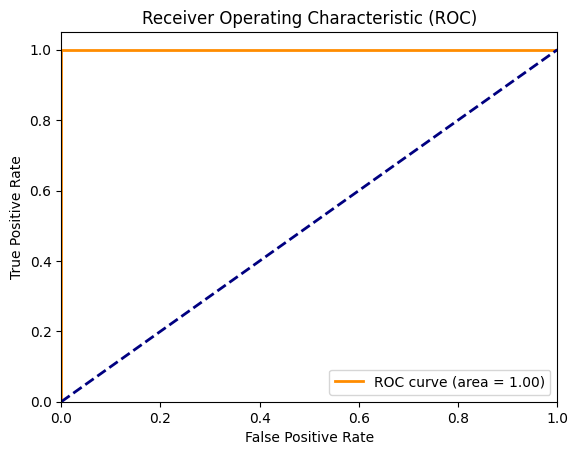

In [40]:
from sklearn.model_selection import  RandomizedSearchCV
from scipy.stats import uniform, randint




# # Cargar los datos desde el CSV, ignorando la columna de índice
# file_path = 'C:\\Users\\48242450\\Documents\\Pruebas-Proyecto\\conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis (2).csv'
# df = pd.read_csv(file_path, index_col=0)

# Verificar los nombres de las columnas
print(df.columns)

# Revisar si hay valores faltantes en el dataframe
print(df.isna().sum())

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X = df.drop(['group', 'Initial_EDSS', 'Final_EDSS'], axis=1)
y = df['group']

# Imputar valores faltantes en X
X_imputed = imputer.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Definir el modelo SVM y los parámetros para la búsqueda en RandomizedSearchCV
svm_model = SVC(probability=True)

# Parámetros para explorar con RandomizedSearchCV
param_dist = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': uniform(0.1, 100),  # Distribución uniforme para la regularización
    'gamma': ['scale', 'auto'],  # Parámetro del kernel RBF y polinómico
    'degree': randint(3, 6)  # Solo se aplica al kernel polinomial
}

# Implementar RandomizedSearchCV con mayor verbosidad
random_search = RandomizedSearchCV(svm_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='roc_auc', verbose=3, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = random_search.best_estimator_
print(f"Mejores parámetros: {random_search.best_params_}")

# Hacer predicciones con el mejor modelo
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Calcular ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=best_model.classes_[1])
roc_auc = roc_auc_score(y_test, y_prob)

print(f'ROC AUC: {roc_auc:.2f}')

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


20 casos verdaderamente positivos.
6 falsos negativos.
8 falsos positivos.
21 verdaderamente negativos.


### HyperOpt

100%|██████████| 100/100 [00:01<00:00, 53.75trial/s, best loss: -1.0]
[[26  0]
 [ 1 28]]
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        26
           2       1.00      0.97      0.98        29

    accuracy                           0.98        55
   macro avg       0.98      0.98      0.98        55
weighted avg       0.98      0.98      0.98        55

ROC AUC: 1.00


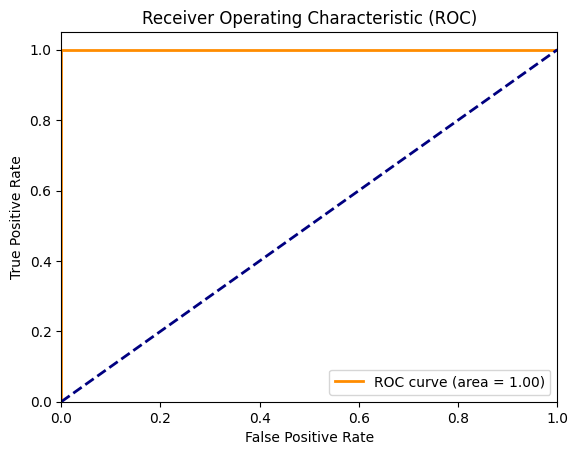

In [41]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from hyperopt.pyll.base import scope


# # Cargar los datos desde el CSV, ignorando la columna de índice
# file_path = 'C:\\Users\\48242450\\Documents\\Pruebas-Proyecto\\conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis (2).csv'
# df = pd.read_csv(file_path, index_col=0)

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X = df.drop(['group', 'Initial_EDSS', 'Final_EDSS'], axis=1)
y = df['group']
X_imputed = imputer.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Definir el espacio de búsqueda para HyperOpt
space = {
    'kernel': hp.choice('kernel', ['linear', 'rbf', 'poly']),
    'C': hp.uniform('C', 0.1, 100),
    'gamma': hp.choice('gamma', ['scale', 'auto']),
    'degree': scope.int(hp.quniform('degree', 3, 5, 1))  # Asegurarse de que 'degree' sea un entero
}

# Función objetivo para minimizar
def objective(params):
    # Si 'kernel' es 'poly', asegúrate de que 'degree' sea relevante
    if params['kernel'] == 'poly' and 'degree' not in params:
        params['degree'] = 3  # O asigna un valor predeterminado si 'degree' no está en los parámetros

    svm_model = SVC(probability=True, **params)
    svm_model.fit(X_train, y_train)
    y_prob = svm_model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob)
    return {'loss': -roc_auc, 'status': STATUS_OK}

# Ejecutar HyperOpt
trials = Trials()
best_params = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials, rstate=None)

# Convertir 'degree' a entero si es necesario
best_params['degree'] = int(best_params['degree'])

# Si 'kernel' es un índice en lugar del valor, asigna el valor correcto
kernel_options = ['linear', 'rbf', 'poly']
best_params['kernel'] = kernel_options[best_params['kernel']]

# Ajustar el modelo con los mejores parámetros
svm_model = SVC(probability=True, **best_params)
svm_model.fit(X_train, y_train)

# Hacer predicciones con el mejor modelo
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Calcular ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=svm_model.classes_[1])
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC: {roc_auc:.2f}')

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [43]:
from sklearn.metrics import accuracy_score
# Calcular la precisión
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.2f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.2f}")

Precisión en el conjunto de entrenamiento: 1.00
Precisión en el conjunto de prueba: 0.98
